# 1. Load the dataset into python environment


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv("titanic_dataset.csv",index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.shape

(891, 11)

# 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Null value present in this dataset

There are 177 missing Values in Age column, 687 missing Values in Cabin column ,and 2 missing Values in Embarked column.

0.5102446555756495


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

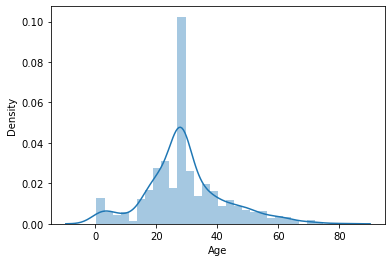

In [12]:
import warnings
print(data["Age"].skew())
sns.distplot(data["Age"])

Since the value of skewness is between -0.5 and 0.5 we can consider the data to be fairly symmetrical.

Hence, We'll proceed to fill the missing values with Mean/Median

In [9]:
data['Cabin'] = data['Cabin'].fillna('unknown')
data['Age']=data['Age'].fillna(data['Age'].median())

data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,unknown,S


# 5. Check and handle outliers in at least 3 columns in the datase

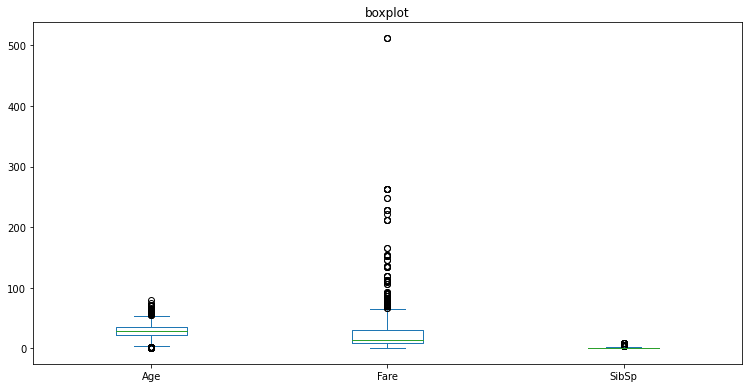

In [11]:
mlt.rcParams["figure.figsize"] = [10.50, 5.50]
mlt.rcParams["figure.autolayout"] = True
data[['Age', 'Fare','SibSp']].plot(kind='box', title='boxplot')
mlt.show()

In [12]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1, Q2, Q3)

IQR=Q3-Q1
print(IQR)

low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print('LOWER LIMIT = ',low_limit)
print('UPPER LIMIT = ',upp_limit)

outlier=[]
for i in data['Fare']:
    if((i>upp_limit) | (i<low_limit)):
        outlier.append(i)
print("outlier = ",outlier)

7.9104 14.4542 31.0
23.0896
LOWER LIMIT =  -26.724
UPPER LIMIT =  65.6344
outlier =  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 6

In [13]:
drop_index = data[(data["Fare"] < low_limit) | (data["Fare"] > upp_limit)].index
data.drop(drop_index,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,unknown,S


In [14]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1, Q2, Q3)

IQR=Q3-Q1
print(IQR)

low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print('LOWER LIMIT = ',low_limit)
print('UPPER LIMIT = ',upp_limit)

outlier=[]
for i in data['Age']:
    if((i>upp_limit) | (i<low_limit)):
        outlier.append(i)
print("outlier = ",outlier)

22.0 28.0 34.0
12.0
LOWER LIMIT =  4.0
UPPER LIMIT =  52.0
outlier =  [54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [15]:
drop_index = data[(data["Age"] < low_limit) | (data["Age"] > upp_limit)].index
data.drop(drop_index,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,unknown,S


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df['Name']=lb.fit_transform(df["Name"])
df['Sex']=lb.fit_transform(df["Sex"])
df['Ticket']=lb.fit_transform(df["Ticket"])
df['Cabin']=lb.fit_transform(df["Cabin"])
df['Embarked']=lb.fit_transform(df["Embarked"])


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  708 non-null    int64  
 1   Pclass    708 non-null    int64  
 2   Name      708 non-null    object 
 3   Sex       708 non-null    object 
 4   Age       708 non-null    float64
 5   SibSp     708 non-null    int64  
 6   Parch     708 non-null    int64  
 7   Ticket    708 non-null    object 
 8   Fare      708 non-null    float64
 9   Cabin     708 non-null    object 
 10  Embarked  708 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.4+ KB


In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [19]:
x=df.drop('Survived',axis=1)
x.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.836071,257.353842,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,222.500000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,3.000000,667.500000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(data[['Survived']])
X_train_copy = data.copy(deep=True)
X_train_copy['Survived_minmax'] = mms.transform(X_train_copy[['Survived']])
X_train_copy.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_minmax
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,0.0
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,unknown,Q,0.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unknown,S,1.0


# Applying ML Algorithms

df = data

In [13]:
corr_matrix = df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preparation

In [15]:
q = [ 'PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_train_set = df.drop(q, axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


Translate non-numerical features to numerical features

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_train_set.iloc[:, 2] = labelencoder.fit_transform(df_train_set.iloc[:, 2].values)
df_train_set.iloc[:, 4] = labelencoder.fit_transform(df_train_set.iloc[:, 4].values)

In [17]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 28.0 KB


# Train data split

In [18]:
x = df_train_set.iloc[:, 1:5].values
y = df_train_set.iloc[:, 0].values

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.4)
x_train.shape

(534, 4)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(534, 4)
(357, 4)
(534,)
(357,)


# 1) Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

y_train_pred = model.predict(x_train) #To checking training data prediction & accuracy in future

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print("\nThe accuracy score of LR model is : ", accuracy_score(y_test,predict))
print("The F1 score of LR model is : ", f1_score(y_test,predict,average="micro"))
print("\nThe accuracy score of LR model is : \n", confusion_matrix(y_test,predict))

Training Accuracy is :  0.7659176029962547

The accuracy score of LR model is :  0.7955182072829131
The F1 score of LR model is :  0.7955182072829131

The accuracy score of LR model is : 
 [[193  41]
 [ 32  91]]


# 2) KNN Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier


classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

y_train_pred1 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print("\nThe accuracy score of KNN model is : ", accuracy_score(y_test,predict1))
print("The F1 score of KNN model is : ", f1_score(y_test,predict1,average="micro"))
print("\nThe confusion matrix of KNN model is : \n", confusion_matrix(y_test,predict1))

Training Accuracy is :  0.8183520599250936

The accuracy score of KNN model is :  0.7787114845938375
The F1 score of KNN model is :  0.7787114845938375

The confusion matrix of KNN model is : 
 [[211  23]
 [ 56  67]]


# 3) SVM Model

In [23]:
from sklearn import svm
from sklearn.svm import SVC

svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
predict2a = svm_linear.predict(x_test)

y_train_pred2a = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2a))
print("\nThe accuracy score of linear SVM model is : ", accuracy_score(y_test,predict2a))
print("The f1 score of linear SVM model is : ", f1_score(y_test,predict2a, average="micro"))
print("\nThe confusion matrix for linear SVM model is : \n", confusion_matrix(y_test,predict2a))

Training Accuracy is :  0.7734082397003745

The accuracy score of linear SVM model is :  0.8067226890756303
The f1 score of linear SVM model is :  0.8067226890756303

The confusion matrix for linear SVM model is : 
 [[204  30]
 [ 39  84]]


# 4) Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
predict3 = d_tree.predict(x_test)

y_train_pred3 = d_tree.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print("\nThe accuracy score of Decision tree model is : ", accuracy_score(y_test,predict3))
print("The f1 score of Decision tree model is : ", f1_score(y_test,predict3,average="micro"))
print("\nThe confusion matrix of Decision tree model is : \n", confusion_matrix(y_test,predict3))

Training Accuracy is :  0.9044943820224719

The accuracy score of Decision tree model is :  0.8375350140056023
The f1 score of Decision tree model is :  0.8375350140056023

The confusion matrix of Decision tree model is : 
 [[216  18]
 [ 40  83]]


# 5) Random Forest Classifier Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
predict4 = rf_model.predict(x_test)

y_train_pred4 = rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print("\nThe accuracy score for Random Forest Model is : ", accuracy_score(y_test,predict4))
print("The f1 score is : ", f1_score(y_test,predict4,average="micro"))
print("\n The confusion matrix is : \n", confusion_matrix(y_test,predict4))

Training Accuracy is :  0.9044943820224719

The accuracy score for Random Forest Model is :  0.8151260504201681
The f1 score is :  0.8151260504201681

 The confusion matrix is : 
 [[205  29]
 [ 37  86]]


Overall Summary for the Various models created :

After Analysing the Data

In general terms , all the Models are performing relatively well.

Accuracy score for Logistic Regression Model is, 0795

Accuracy score for KNN Model is, 0.778

Accuracy score for Linear SVM Model is, 0.81

Accuracy score for Decision Tree Model is, 0.83

Accuracy score for Random Forest Classifier Model is, 0.85